In [111]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras import layers, models, Input
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Data loading

In [54]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# EDA

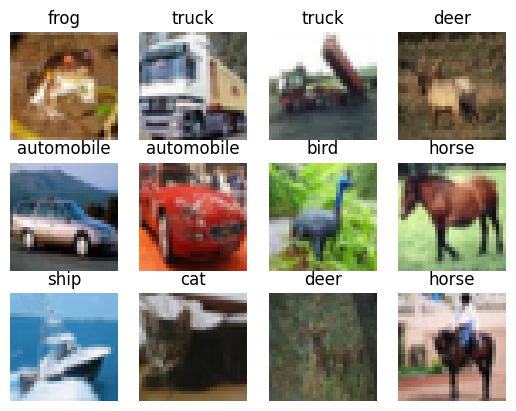

In [62]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(0)
for i in range(12):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i,0]])
plt.show()

In [56]:
x_train.mean(axis=0).shape

(32, 32, 3)

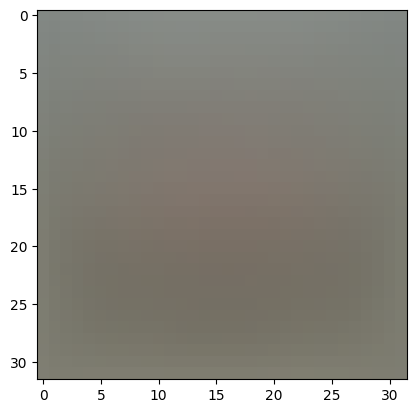

In [57]:
plt.imshow(x_train.mean(axis=0))

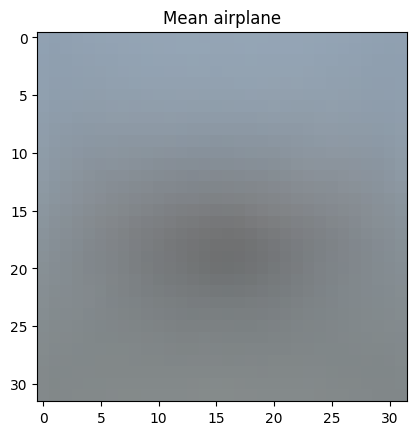

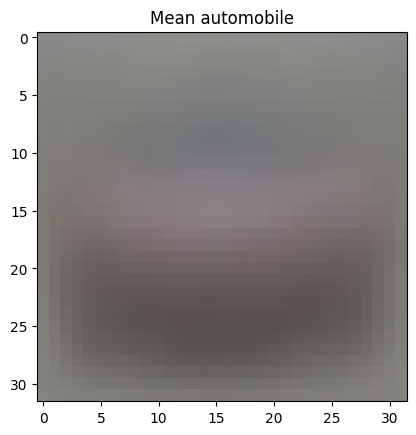

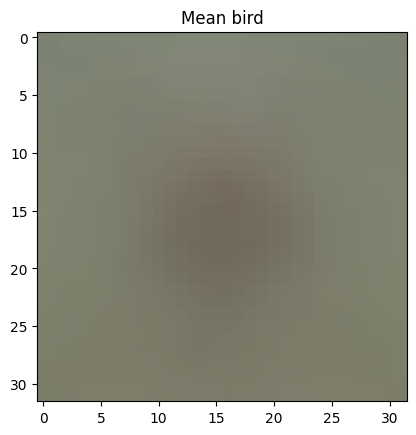

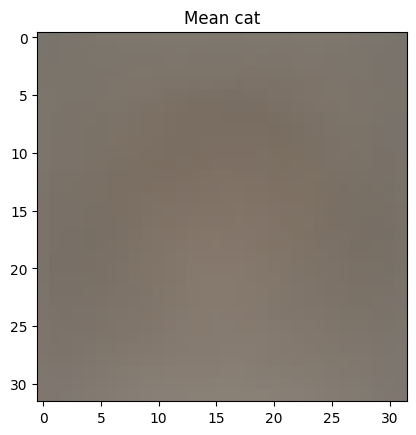

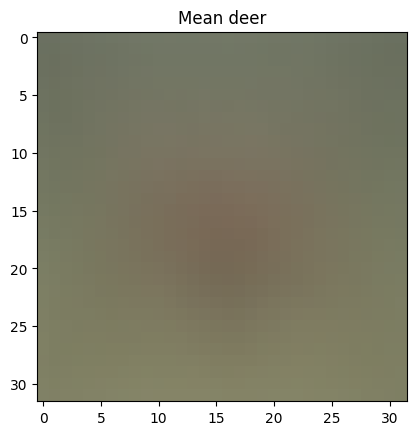

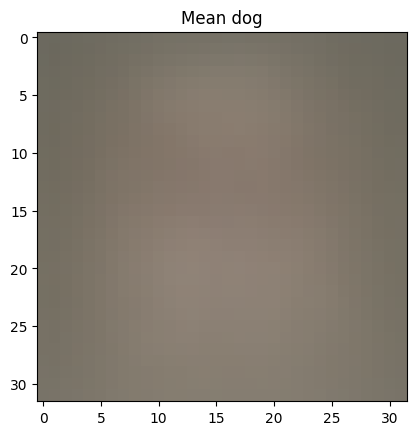

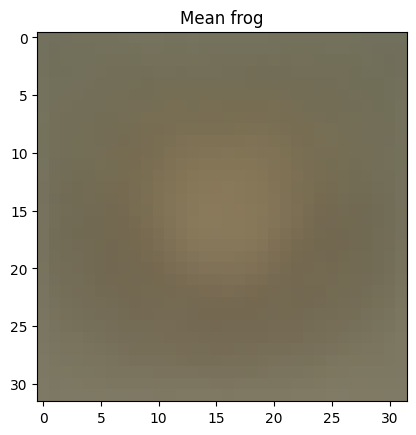

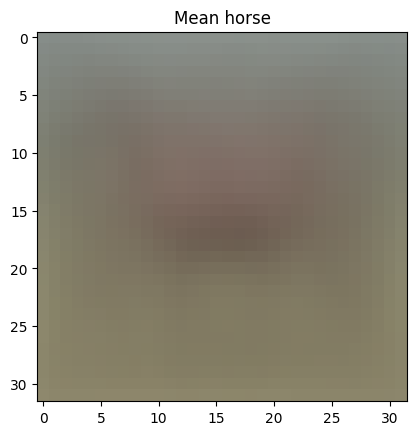

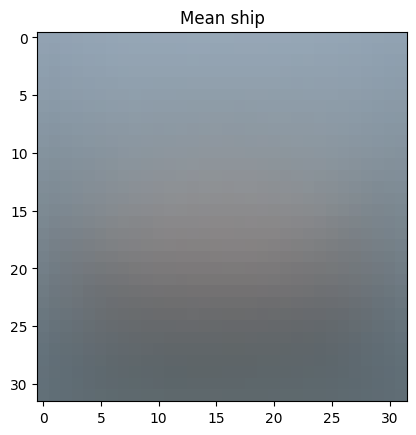

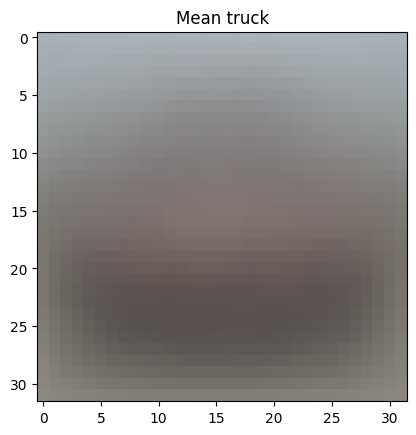

In [63]:
for i in np.unique(y_train):
    plt.imshow(x_train[(y_train==i).flatten(),:,:].mean(axis=0))
    plt.title(f'Mean {class_names[i]}')
    plt.show()

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


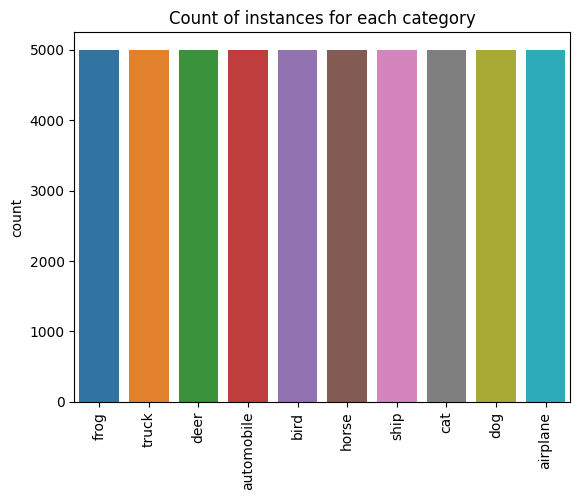

In [74]:
sns.countplot(x=list(map(lambda x: class_names[x], y_train.flatten())))
plt.xticks(rotation=90)
plt.title('Count of instances for each category')
plt.show()

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


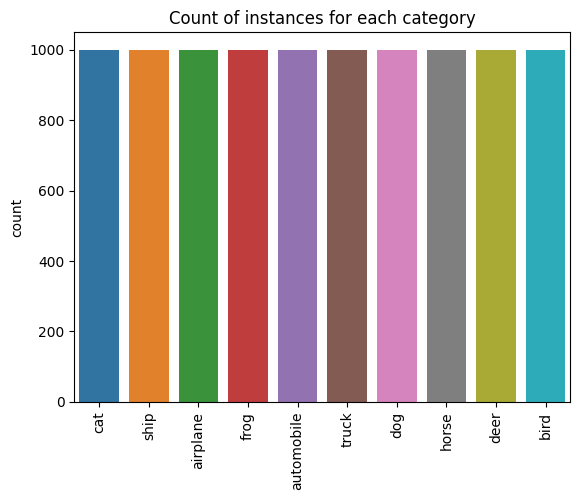

In [75]:
sns.countplot(x=list(map(lambda x: class_names[x], y_test.flatten())))
plt.xticks(rotation=90)
plt.title('Count of instances for each category')
plt.show()

# CNN

## Base model

In [84]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(10))

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [85]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        54,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,682 (213.60 KB)

 Trainable params: 54,682 (213.60 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
cnn.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
history_cnn = cnn.fit(x_train, y_train,
                     epochs=10, batch_size=32,
                     validation_split=0.1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3967 - loss: 1.7108 - val_accuracy: 0.5258 - val_loss: 1.3612
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5559 - loss: 1.2704 - val_accuracy: 0.5862 - val_loss: 1.2201
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6029 - loss: 1.1514 - val_accuracy: 0.5862 - val_loss: 1.1903
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6263 - loss: 1.0823 - val_accuracy: 0.6146 - val_loss: 1.1277
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6411 - loss: 1.0357 - val_accuracy: 0.6192 - val_loss: 1.1134
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6633 - loss: 0.9860 - val_accuracy: 0.6280 - val_loss: 1.1003
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6640 - loss: 0.9683 - val_accuracy: 0.6402 - val_loss: 1.0794
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6811 - loss: 0.9319 -

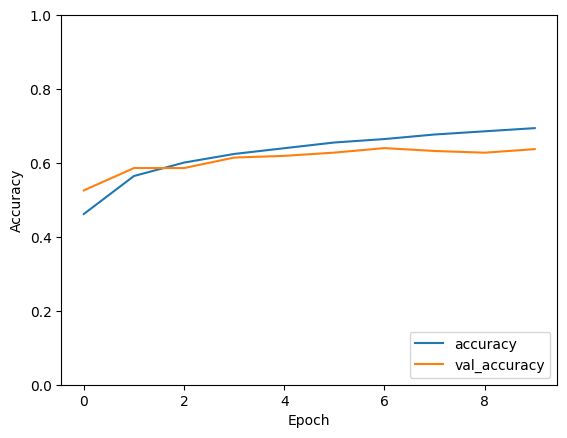

In [88]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

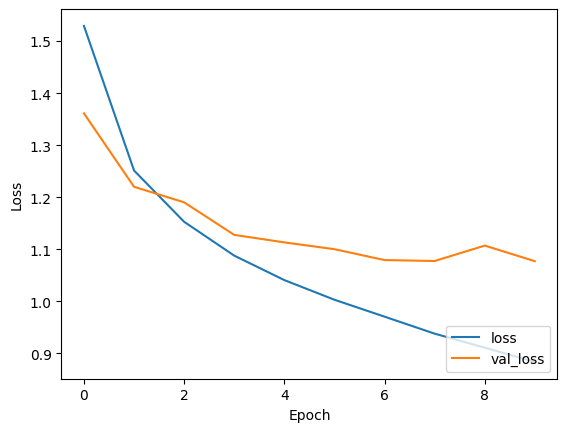

In [91]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn.history['loss'], label='loss')
plt.plot(history_cnn.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [92]:
# loss function and accuracy on test set for model [cnn]
test_loss_cnn, test_acc_cnn = cnn.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.6266 - loss: 1.0991


In [93]:
test_loss_cnn

1.0990933179855347

In [94]:
test_acc_cnn

0.6266000270843506

## Change number of kernels/filters

In [115]:
def kernel_num_model(kernel_num):
    kmodel = models.Sequential()
    kmodel.add(Input(shape=(32, 32, 3)))
    kmodel.add(layers.Conv2D(filters = kernel_num, 
                             kernel_size = (3, 3), 
                             padding = 'valid',
                             strides = 1,
                             activation='relu'))
    kmodel.add(layers.MaxPooling2D((2, 2)))
    kmodel.add(layers.Flatten())
    kmodel.add(layers.Dense(10))
    kmodel.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return kmodel
    

In [119]:
m = 1 #repeat
kernel_nums = [16+8*i for i in range(10)]
n = len(kernel_nums)
train_acc_k = np.zeros((n,m))
test_acc_k = np.zeros((n,m))
train_loss_k = np.zeros((n,m))
test_loss_k = np.zeros((n,m))
for j in range(m):
    for i in range(n):
        temp_model1_k = kernel_num_model(kernel_nums[i])
        temp_model_k = temp_model1_k.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
        train_acc_k[i,j] = temp_model_k.history['accuracy'][-1]
        test_acc_k[i,j] = temp_model_k.history['val_accuracy'][-1]
        train_loss_k[i,j] = temp_model_k.history['loss'][-1]
        test_loss_k[i,j] = temp_model_k.history['val_loss'][-1]
        print(f'ROUND {j*n+i}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3864 - loss: 1.7368 - val_accuracy: 0.5356 - val_loss: 1.3192
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5541 - loss: 1.2778 - val_accuracy: 0.5484 - val_loss: 1.2799
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5880 - loss: 1.1815 - val_accuracy: 0.5753 - val_loss: 1.2169
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6030 - loss: 1.1372 - val_accuracy: 0.5865 - val_loss: 1.1767
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6151 - loss: 1.1050 - val_accuracy: 0.5905 - val_loss: 1.1738
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6330 - loss: 1.0653 - val_accuracy: 0.5993 - val_loss: 1.1644
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6419 - loss: 1.0421 - val_accuracy: 0.5951 - val_loss: 1.1594
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6514 -

In [123]:
train_acc_k.mean(axis=1)

array([0.65755999, 0.70532   , 0.72719997, 0.73468   , 0.74357998,
       0.7464    , 0.75712001, 0.76296002, 0.76810002, 0.77388   ])

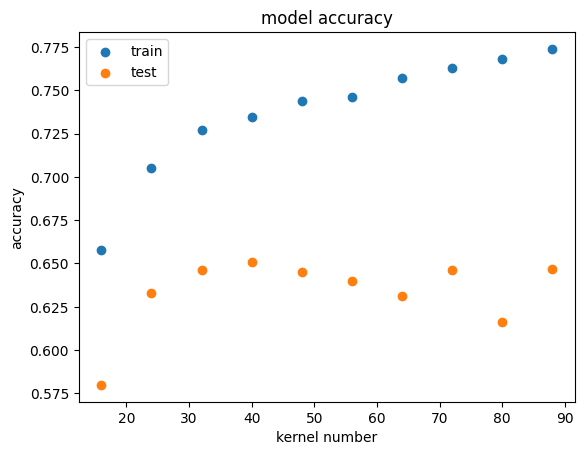

In [124]:
plt.scatter(kernel_nums, train_acc_k.mean(axis=1))
plt.scatter(kernel_nums, test_acc_k.mean(axis=1))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('kernel number')
plt.legend(['train', 'test'])
plt.show()

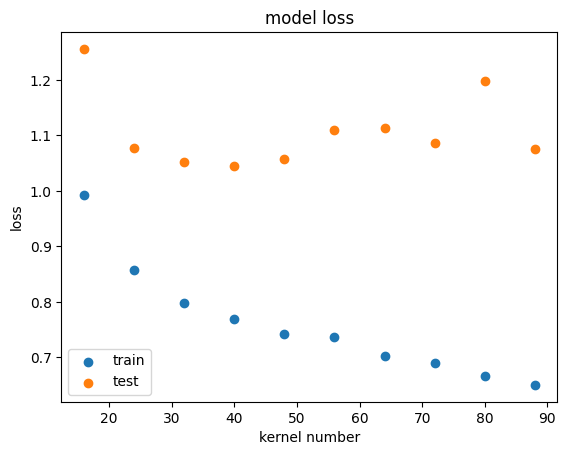

In [125]:
plt.scatter(kernel_nums, train_loss_k.mean(axis=1))
plt.scatter(kernel_nums, test_loss_k.mean(axis=1))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('kernel number')
plt.legend(['train', 'test'])
plt.show()

## Change kernel size

In [126]:
def kernel_size_model(ks):
    ksmodel = models.Sequential()
    ksmodel.add(Input(shape=(32, 32, 3)))
    ksmodel.add(layers.Conv2D(filters = 36, 
                             kernel_size = (ks, ks), 
                             padding = 'valid',
                             strides = 1,
                             activation='relu'))
    ksmodel.add(layers.MaxPooling2D((2, 2)))
    ksmodel.add(layers.Flatten())
    ksmodel.add(layers.Dense(10))
    ksmodel.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return ksmodel
    

In [129]:
m = 1 #repeat
n = 10
train_acc_ks = np.zeros((n,m))
test_acc_ks = np.zeros((n,m))
train_loss_ks = np.zeros((n,m))
test_loss_ks = np.zeros((n,m))
for j in range(m):
    for i in range(n):
        temp_model1_ks = kernel_size_model(i+1)
        temp_model_ks = temp_model1_ks.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
        train_acc_ks[i,j] = temp_model_ks.history['accuracy'][-1]
        test_acc_ks[i,j] = temp_model_ks.history['val_accuracy'][-1]
        train_loss_ks[i,j] = temp_model_ks.history['loss'][-1]
        test_loss_ks[i,j] = temp_model_ks.history['val_loss'][-1]
        print(f'ROUND {j*n+i}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3673 - loss: 1.7938 - val_accuracy: 0.4687 - val_loss: 1.5158
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4782 - loss: 1.5058 - val_accuracy: 0.4882 - val_loss: 1.4747
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5001 - loss: 1.4463 - val_accuracy: 0.4980 - val_loss: 1.4446
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5139 - loss: 1.4019 - val_accuracy: 0.5022 - val_loss: 1.4223
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5205 - loss: 1.3802 - val_accuracy: 0.5098 - val_loss: 1.3939
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5316 - loss: 1.3479 - val_accuracy: 0.5049 - val_loss: 1.4140
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5400 - loss: 1.3208 - val_accuracy: 0.5154 - val_loss: 1.3755
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5529 - los

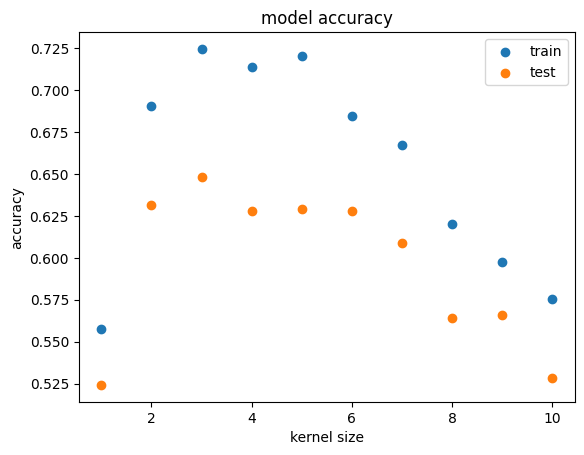

In [130]:
plt.scatter(range(1,11), train_acc_ks.mean(axis=1))
plt.scatter(range(1,11), test_acc_ks.mean(axis=1))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('kernel size')
plt.legend(['train', 'test'])
plt.show()

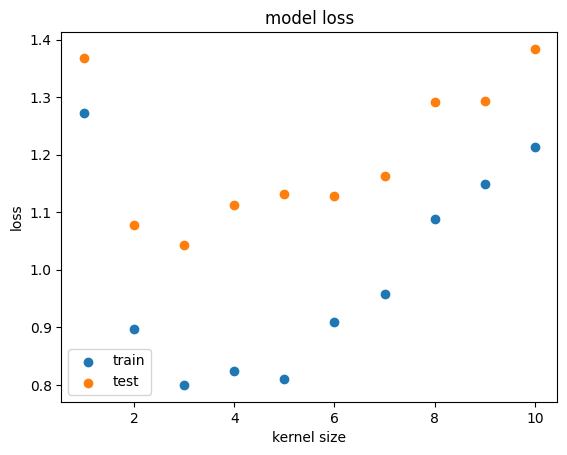

In [131]:
plt.scatter(range(1,11), train_loss_ks.mean(axis=1))
plt.scatter(range(1,11), test_loss_ks.mean(axis=1))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('kernel size')
plt.legend(['train', 'test'])
plt.show()

## Change padding

In [132]:
def padding_model(p):
    pmodel = models.Sequential()
    pmodel.add(Input(shape=(32, 32, 3)))
    pmodel.add(layers.Conv2D(filters = 36, 
                             kernel_size = (3, 3), 
                             padding = p,
                             strides = 1,
                             activation='relu'))
    pmodel.add(layers.MaxPooling2D((2, 2)))
    pmodel.add(layers.Flatten())
    pmodel.add(layers.Dense(10))
    pmodel.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return pmodel
    

In [137]:
m = 20 #repeat
padding_opt = ['valid', 'same']
n = len(padding_opt)
train_acc_p = np.zeros((n,m))
test_acc_p = np.zeros((n,m))
train_loss_p = np.zeros((n,m))
test_loss_p = np.zeros((n,m))
for i in range(n):
    temp_model1_p = padding_model(padding_opt[i])
    temp_model_p = temp_model1_p.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
    train_acc_p[i,:] = temp_model_p.history['accuracy']
    test_acc_p[i,:] = temp_model_p.history['val_accuracy']
    train_loss_p[i,:] = temp_model_p.history['loss']
    test_loss_p[i,:] = temp_model_p.history['val_loss']
    print(f'ROUND {j*n+i}')

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.4157 - loss: 1.6414 - val_accuracy: 0.5256 - val_loss: 1.3394
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5698 - loss: 1.2366 - val_accuracy: 0.5452 - val_loss: 1.2713
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6171 - loss: 1.1084 - val_accuracy: 0.5972 - val_loss: 1.1489
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6518 - loss: 1.0170 - val_accuracy: 0.6042 - val_loss: 1.1439
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6672 - loss: 0.9669 - val_accuracy: 0.6300 - val_loss: 1.0800
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6884 - loss: 0.9092 - val_accuracy: 0.6302 - val_loss: 1.0869
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6988 - loss: 0.8756 - val_accuracy: 0.6286 - val_loss: 1.0791
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7113 - loss: 0

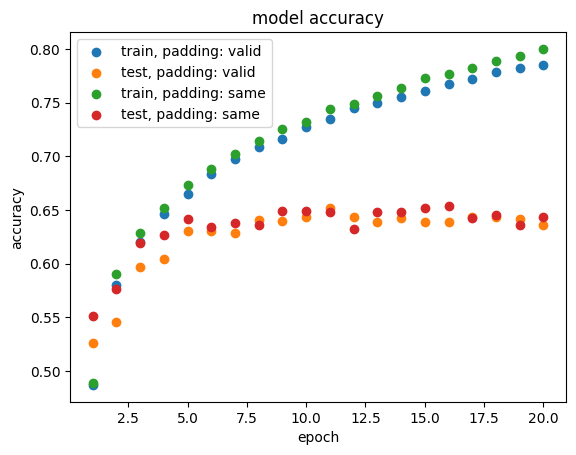

In [138]:
for i in range(2):
    plt.scatter(range(1,21), train_acc_p[i,:], label=f'train, padding: {padding_opt[i]}')
    plt.scatter(range(1,21), test_acc_p[i,:], label=f'test, padding: {padding_opt[i]}')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

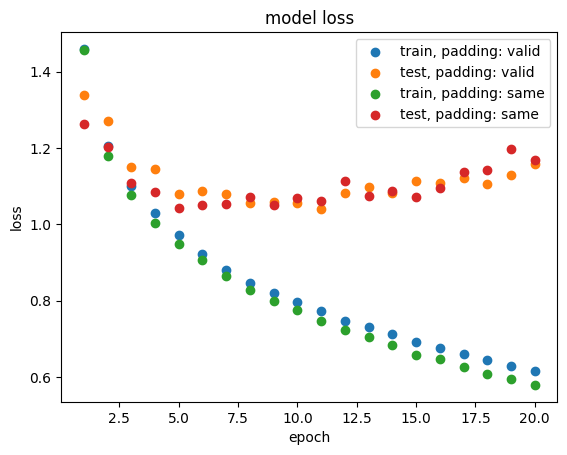

In [139]:
for i in range(2):
    plt.scatter(range(1,21), train_loss_p[i,:], label=f'train, padding: {padding_opt[i]}')
    plt.scatter(range(1,21), test_loss_p[i,:], label=f'test, padding: {padding_opt[i]}')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Change strides

In [141]:
def strides_model(s):
    smodel = models.Sequential()
    smodel.add(Input(shape=(32, 32, 3)))
    smodel.add(layers.Conv2D(filters = 36, 
                             kernel_size = (3, 3), 
                             padding = 'valid',
                             strides = s,
                             activation='relu'))
    smodel.add(layers.MaxPooling2D((2, 2)))
    smodel.add(layers.Flatten())
    smodel.add(layers.Dense(10))
    smodel.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return smodel
    

In [142]:
m = 1 #repeat
n = 10
train_acc_s = np.zeros((n,m))
test_acc_s = np.zeros((n,m))
train_loss_s = np.zeros((n,m))
test_loss_s = np.zeros((n,m))
for j in range(m):
    for i in range(n):
        temp_model1_s = strides_model(i+1)
        temp_model_s = temp_model1_s.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
        train_acc_s[i,j] = temp_model_s.history['accuracy'][-1]
        test_acc_s[i,j] = temp_model_s.history['val_accuracy'][-1]
        train_loss_s[i,j] = temp_model_s.history['loss'][-1]
        test_loss_s[i,j] = temp_model_s.history['val_loss'][-1]
        print(f'ROUND {j*n+i}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.4116 - loss: 1.6573 - val_accuracy: 0.5614 - val_loss: 1.2495
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5862 - loss: 1.1992 - val_accuracy: 0.6025 - val_loss: 1.1494
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6294 - loss: 1.0807 - val_accuracy: 0.6104 - val_loss: 1.1245
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6560 - loss: 1.0024 - val_accuracy: 0.6271 - val_loss: 1.0888
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6687 - loss: 0.9635 - val_accuracy: 0.6250 - val_loss: 1.0792
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6841 - loss: 0.9146 - val_accuracy: 0.6302 - val_loss: 1.0819
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6989 - loss: 0.8737 - val_accuracy: 0.6180 - val_loss: 1.0996
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7118 - loss: 0

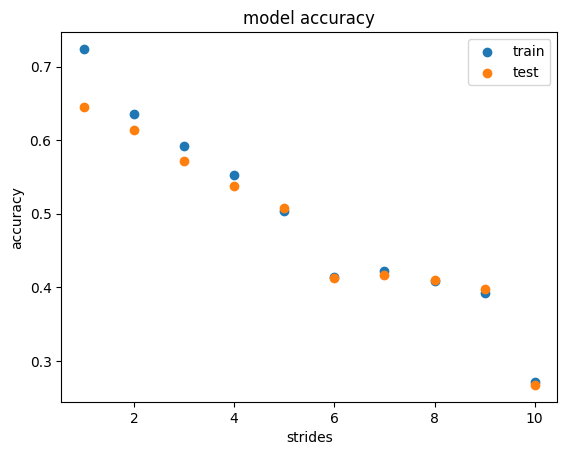

In [145]:
plt.scatter(range(1,11), train_acc_s.mean(axis=1))
plt.scatter(range(1,11), test_acc_s.mean(axis=1))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('strides')
plt.legend(['train', 'test'])
plt.show()

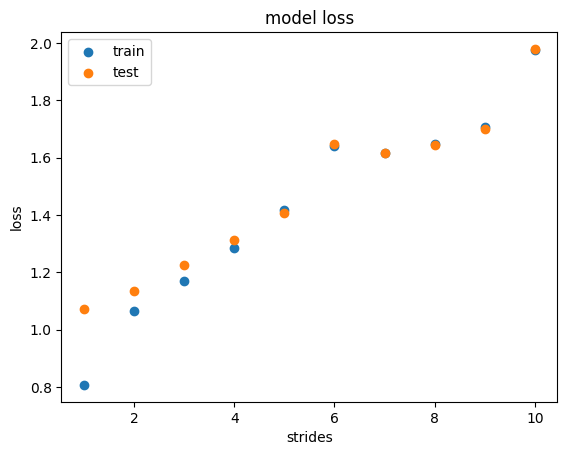

In [146]:
plt.scatter(range(1,11), train_loss_s.mean(axis=1))
plt.scatter(range(1,11), test_loss_s.mean(axis=1))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('strides')
plt.legend(['train', 'test'])
plt.show()